# Lasso using coordient descent with subgradient 

In [2]:
import numpy as np

class LassoRegression:
    def __init__(self, alpha=1.0, max_iter=50, tol=1e-6):
        """
        Lasso regression model
        :param alpha: regularization strength
        :param max_iter: maximum number of iterations
        :param tol: tolerance for stopping criteria
        """
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None

    def sub_gradient(self, z, gamma):
        if z > gamma:
            return z - gamma
        elif z < -gamma:
            return z + gamma
        else:
            return 0

    def fit(self, X, y):
        """
        fit function
        :param X: input data
        :param y: target data
        """
        m, n = X.shape # m: number of samples, n: number of features
        self.coef_ = np.zeros(n)
        self.intercept_ = np.mean(y)

        # centering the data to make the intercept zero
        # or use the method metion on the class, add another zero row and column to the matrix?
        X = X - np.mean(X, axis=0)
        y = y - np.mean(y)

        for _ in range(self.max_iter):
            coef_old = self.coef_.copy()

            for j in range(n):
                # partial residual
                # 　r_j = y - X\beta + X_j\beta_j
                residual_j = y - (X @ self.coef_) + X[:, j] * self.coef_[j]

                # rho_j = X_j^T r_j
                rho_j = X[:, j].T @ residual_j 

                self.coef_[j] = self.sub_gradient(rho_j, m * self.alpha)/ np.sum(X[:, j] ** 2)

            if np.sum(np.abs(self.coef_ - coef_old)) < self.tol:
                print("Converged at iteration", _)
                break
            elif (_ == self.max_iter - 1):
                print("Not converged")

In [ ]:
if __name__ == "__main__":
    
    np.random.seed(0)
    X = np.random.randn(50, 5) 
    beta_true = np.array([3, -1.5, 0, 0, 5])  
    y = X @ beta_true + np.random.randn(50) * 0.5  


    model = LassoRegression(alpha=0.5)
    model.fit(X, y)


    print("Estimated Coefficients:", model.coef_)
    print("Intercept:", model.intercept_) # use mean of y as intercept

Converged at iteration 5
Estimated Coefficients: [ 2.51701447 -0.83652063  0.          0.          4.29150316]
Intercept: 0.0033044203948668026


Converged at iteration 5


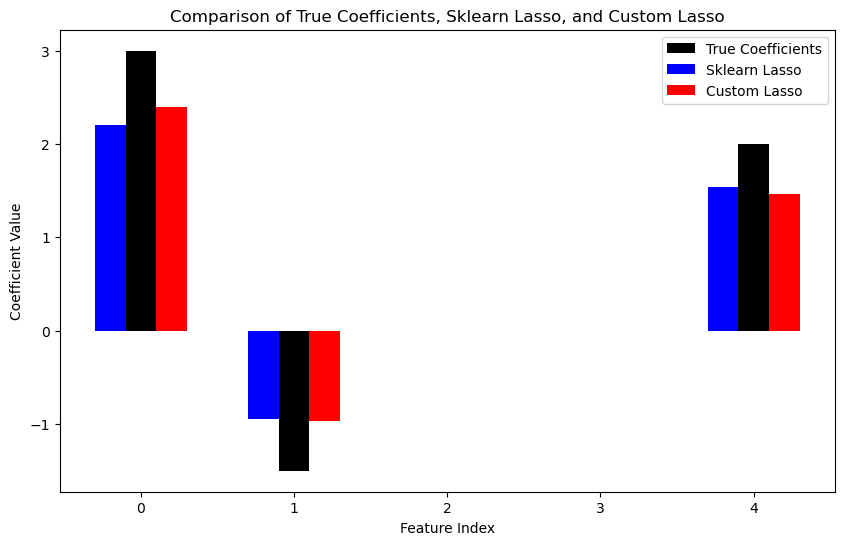

{'True Coefficients': array([ 3. , -1.5,  0. ,  0. ,  2. ]),
 'Sklearn Lasso': array([ 2.20308856, -0.95023985, -0.        ,  0.        ,  1.54192432]),
 'Custom Lasso': array([ 2.39786309, -0.97020425,  0.        ,  0.        ,  1.46759855])}

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
X = np.random.randn(100, 5)  
beta_true = np.array([3, -1.5, 0, 0, 2])  
y = X @ beta_true + np.random.randn(100) * 0.5  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lasso = Lasso(alpha=0.5, max_iter=5000, tol=1e-6)
lasso.fit(X_scaled, y)


lasso_coefs = lasso.coef_

custom_lasso = LassoRegression(alpha=0.5)
custom_lasso.fit(X, y)


custom_lasso_coefs = custom_lasso.coef_


plt.figure(figsize=(10, 6))
plt.bar(range(len(beta_true)), beta_true, width=0.2, label="True Coefficients", color="black")
plt.bar(np.arange(len(beta_true)) - 0.2, lasso_coefs, width=0.2, label="Sklearn Lasso", color="blue")
if custom_lasso_coefs is not None:
    plt.bar(np.arange(len(beta_true)) + 0.2, custom_lasso_coefs, width=0.2, label="Custom Lasso", color="red")

plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of True Coefficients, Sklearn Lasso, and Custom Lasso")
plt.legend()
plt.show()


lasso_results = {
    "True Coefficients": beta_true,
    "Sklearn Lasso": lasso_coefs,
    "Custom Lasso": custom_lasso_coefs
}
lasso_results